<a href="https://colab.research.google.com/github/NP-15/Deep-Learning/blob/main/Lab-02%3A%20Digit%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Class exercise

In [30]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [31]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
# Normalize the pixel values
X_train, X_test = X_train / 255.0, X_test / 255.0

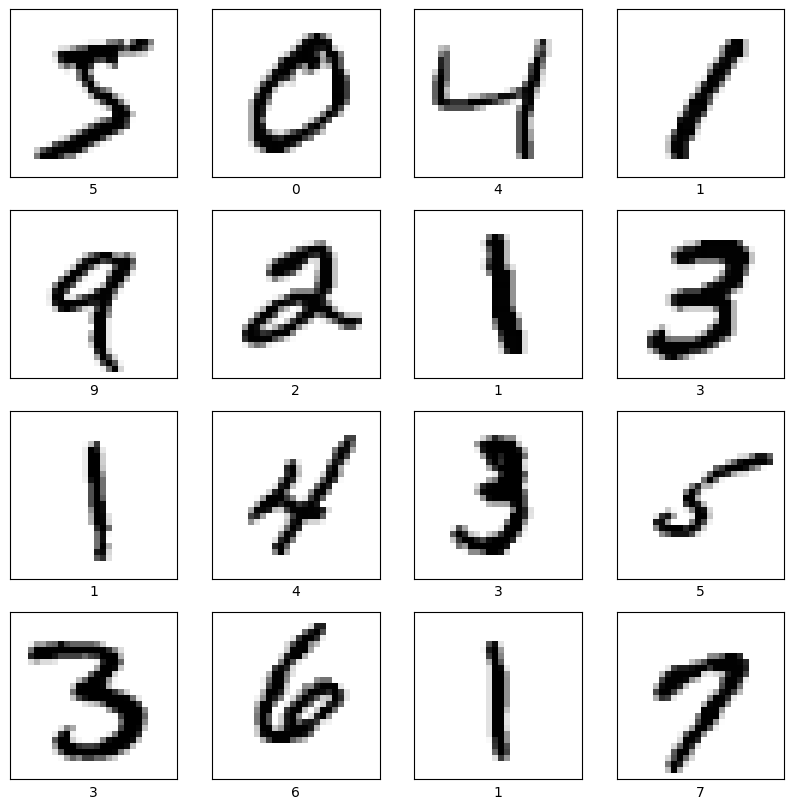

In [32]:
# Display the first few images
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [33]:
# Building the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)), # Flatten the input
    layers.Dense(128, activation='relu'), # First dense layer
    layers.Dropout(0.2), # Dropout for regularization
    layers.Dense(10, activation='softmax') # Output layer
])

# Display the model's architecture
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2976 - accuracy: 0.9137 - val_loss: 0.1469 - val_accuracy: 0.9552
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1437 - accuracy: 0.9582 - val_loss: 0.1017 - val_accuracy: 0.9672
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1088 - accuracy: 0.9666 - val_loss: 0.0864 - val_accuracy: 0.9740
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0890 - accuracy: 0.9720 - val_loss: 0.0814 - val_accuracy: 0.9760
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0742 - accuracy: 0.9772 - val_loss: 0.0829 - val_accuracy: 0.9742
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0660 - accuracy: 0.9786 - val_loss: 0.0726 - val_accuracy: 0.9785
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0589 - accuracy: 0.9809 - val_loss: 0.0697 - val_accu

313/313 - 1s - loss: 0.0734 - accuracy: 0.9783 - 544ms/epoch - 2ms/step

Test accuracy: 0.9782999753952026


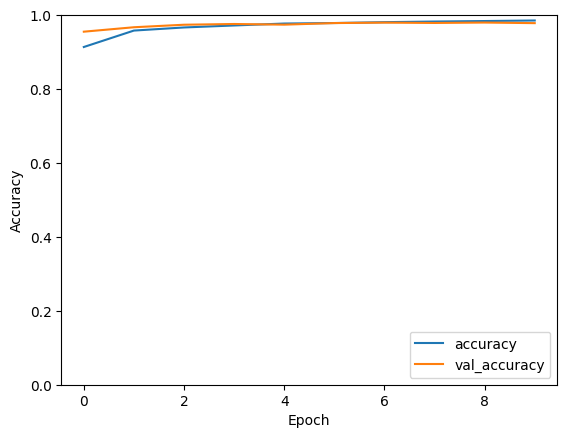

In [35]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

313/313 [==============================] - 1s 2ms/step


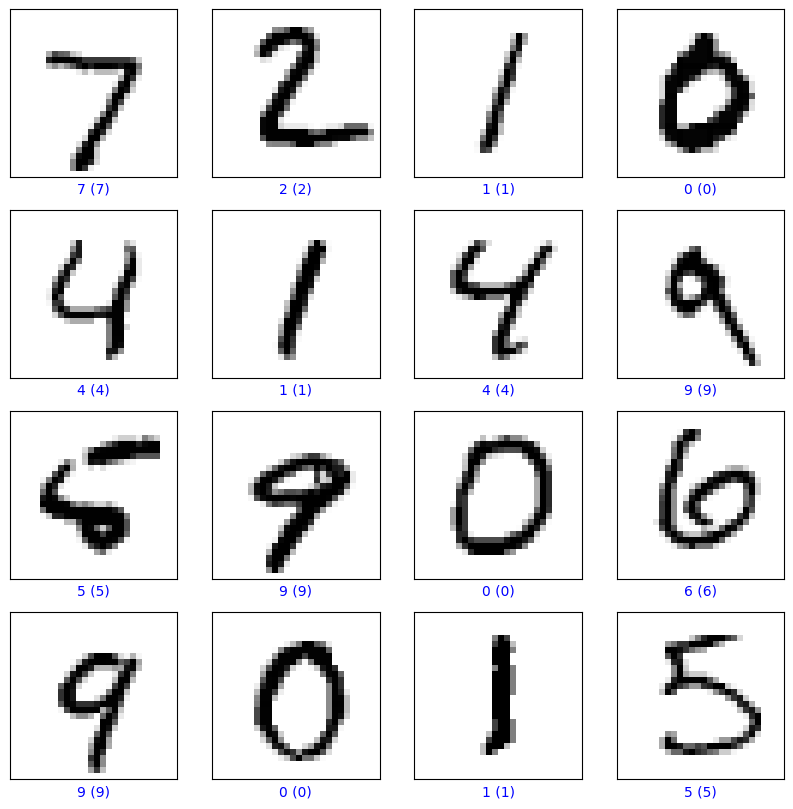

In [36]:
# Make predictions
predictions = model.predict(X_test)

# Plot some predictions with their true labels
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f'{predicted_label} ({true_label})', color=color)
plt.show()

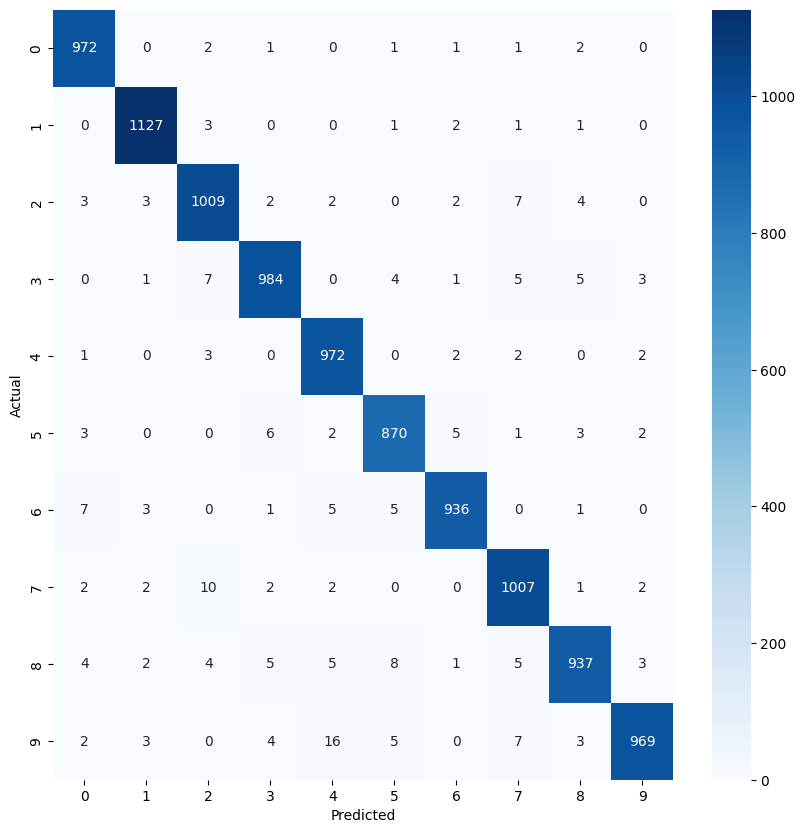

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
y_pred = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10),
yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Exercise 1: Increasing number of neurons

In [38]:
# Building the model
model2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)), # Flatten the input
    layers.Dense(256, activation='relu'), # First dense layer
    layers.Dropout(0.2), # Dropout for regularization
    layers.Dense(20, activation='softmax') # Output layer
])

# Display the model's architecture
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 20)                5140      
                                                                 
Total params: 206100 (805.08 KB)
Trainable params: 206100 (805.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
# Compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history2 = model2.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2607 - accuracy: 0.9241 - val_loss: 0.1204 - val_accuracy: 0.9648
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1159 - accuracy: 0.9652 - val_loss: 0.0846 - val_accuracy: 0.9755
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0847 - accuracy: 0.9738 - val_loss: 0.0837 - val_accuracy: 0.9725
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0661 - accuracy: 0.9793 - val_loss: 0.0849 - val_accuracy: 0.9743
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0542 - accuracy: 0.9826 - val_loss: 0.0743 - val_accuracy: 0.9781
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0464 - accuracy: 0.9845 - val_loss: 0.0754 - val_accuracy: 0.9796
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0395 - accuracy: 0.9870 - val_loss: 0.0699 - val_ac

313/313 - 1s - loss: 0.0702 - accuracy: 0.9811 - 791ms/epoch - 3ms/step

Test accuracy: 0.9811000227928162


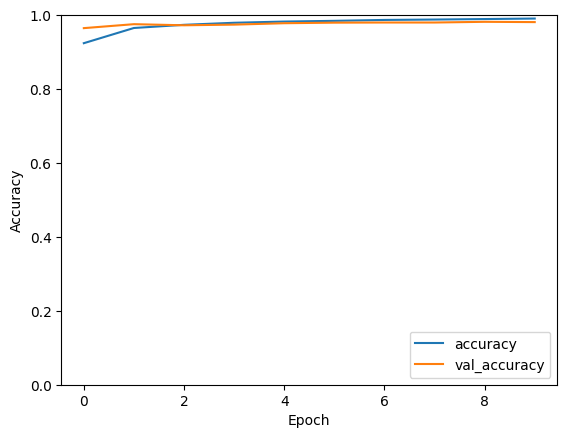

In [40]:
# Evaluate the model
test_loss, test_acc = model2.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Plot training and validation accuracy over epochs
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

313/313 [==============================] - 1s 2ms/step


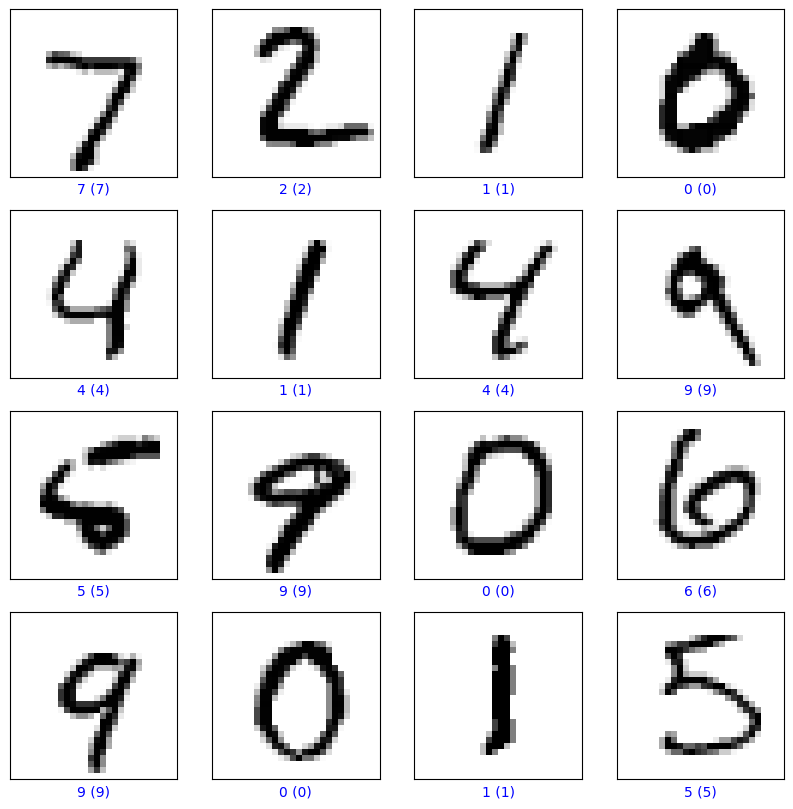

In [41]:
# Make predictions
predictions2 = model2.predict(X_test)

# Plot some predictions with their true labels
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f'{predicted_label} ({true_label})', color=color)
plt.show()


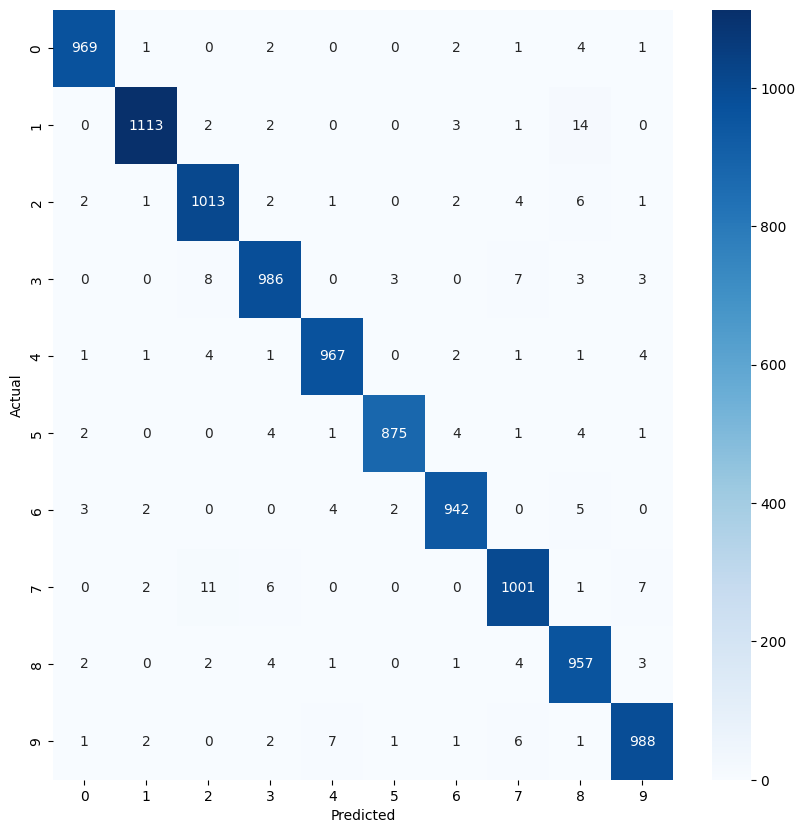

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
y_pred = np.argmax(predictions2, axis=1)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10),
yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Exercise 2: Adding more layers and also increasing dropout layers

In [43]:
from tensorflow.keras import models, layers

# Building the updated model with more layers
model1 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the input
    layers.Dense(128, activation='relu'),   # First dense layer
    layers.Dropout(0.2),                    # Dropout for regularization
    layers.Dense(64, activation='relu'),    # Second dense layer
    layers.Dropout(0.2),                    # Dropout for regularization
    layers.Dense(64, activation='relu'),    # Third dense layer
    layers.Dropout(0.2),                    # Dropout for regularization
    layers.Dense(10, activation='softmax')   # Output layer
])

# Display the model's architecture
model1.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dropout_10 (Dropout)        (None, 64)               

In [44]:
# Compile the model
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history1 = model1.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3823 - accuracy: 0.8858 - val_loss: 0.1318 - val_accuracy: 0.9592
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1817 - accuracy: 0.9479 - val_loss: 0.1166 - val_accuracy: 0.9648
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1435 - accuracy: 0.9584 - val_loss: 0.1009 - val_accuracy: 0.9700
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1206 - accuracy: 0.9652 - val_loss: 0.0875 - val_accuracy: 0.9753
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1093 - accuracy: 0.9679 - val_loss: 0.0877 - val_accuracy: 0.9747
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1002 - accuracy: 0.9704 - val_loss: 0.0772 - val_accuracy: 0.9768
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0908 - accuracy: 0.9728 - val_loss: 0.0727 - val_ac

313/313 - 1s - loss: 0.0735 - accuracy: 0.9788 - 533ms/epoch - 2ms/step

Test accuracy: 0.9787999987602234


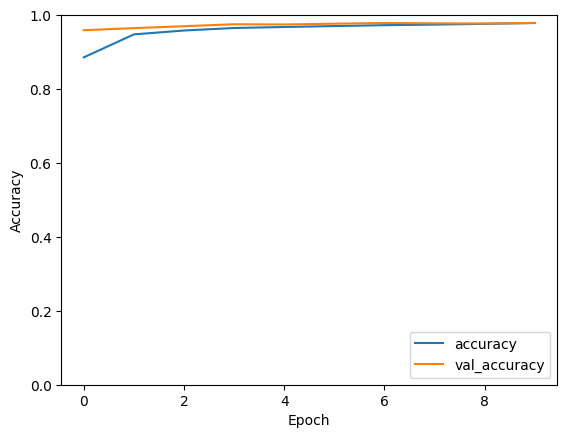

In [45]:
# Evaluate the model
test_loss, test_acc = model1.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Plot training and validation accuracy over epochs
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

313/313 [==============================] - 1s 2ms/step


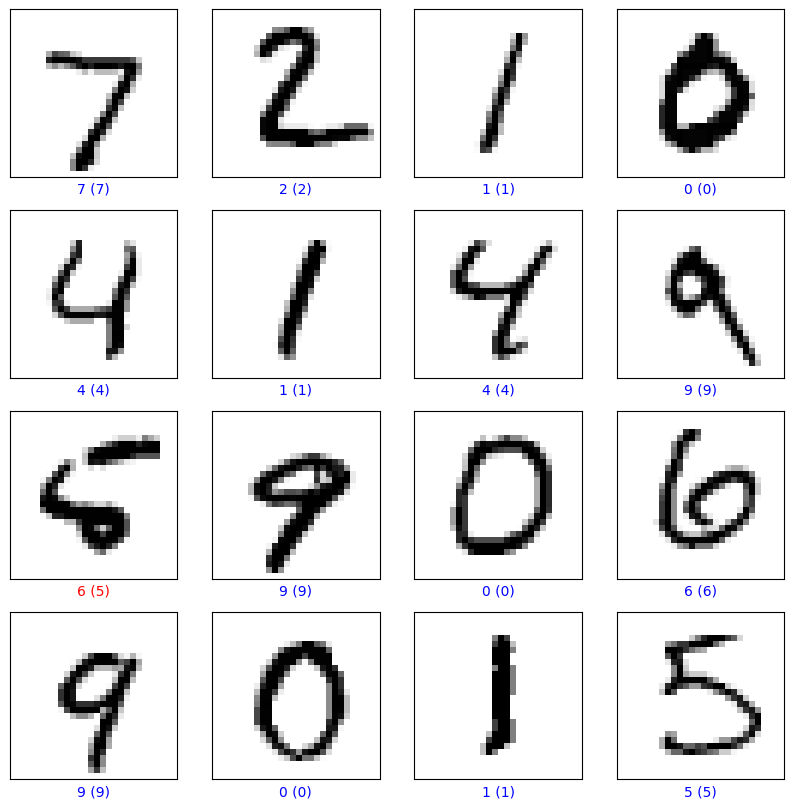

In [46]:
# Make predictions
predictions1 = model1.predict(X_test)

# Plot some predictions with their true labels
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions1[i])
    true_label = y_test[i]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f'{predicted_label} ({true_label})', color=color)
plt.show()

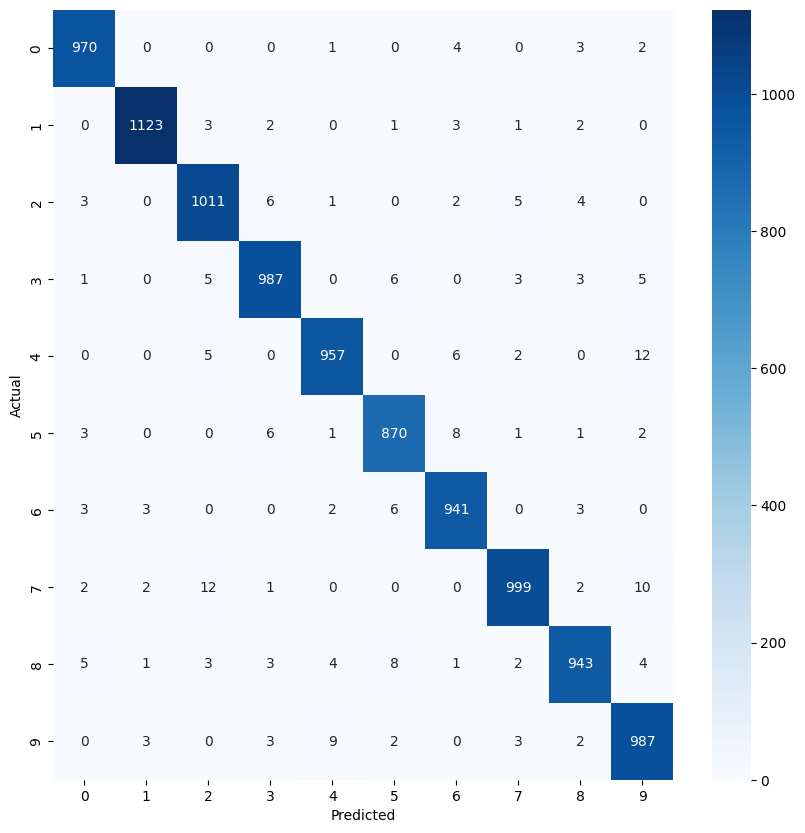

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
y_pred = np.argmax(predictions1, axis=1)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10),
yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Exercise 4 - Using Fashion MNIST dataset

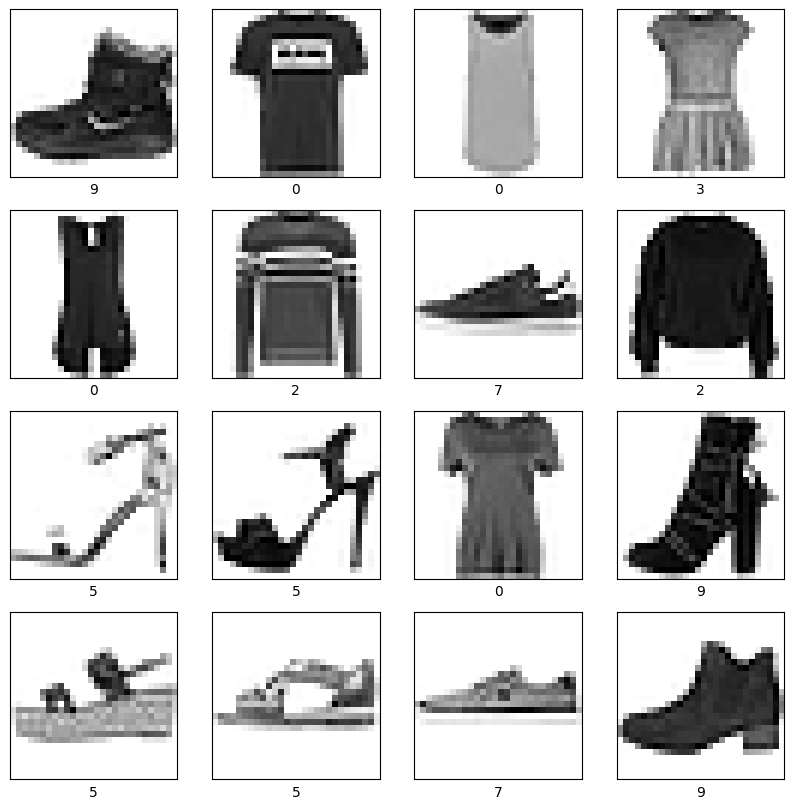

In [48]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
# Load the fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values
X_train, X_test = X_train / 255.0, X_test / 255.0

# Display the first few images
plt.figure(figsize=(10,10))
for i in range(16):
 plt.subplot(4, 4, i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(X_train[i], cmap=plt.cm.binary)
 plt.xlabel(y_train[i])
plt.show()


In [49]:
# Building the model
model = models.Sequential([
 layers.Flatten(input_shape=(28, 28)), # Flatten the input
 layers.Dense(128, activation='relu'), # First dense layer
 layers.Dropout(0.2), # Dropout for regularization
 layers.Dense(10, activation='softmax') # Output layer
])

# Display the model's architecture
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5314 - accuracy: 0.8131 - val_loss: 0.4225 - val_accuracy: 0.8474
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4025 - accuracy: 0.8553 - val_loss: 0.4074 - val_accuracy: 0.8568
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3690 - accuracy: 0.8662 - val_loss: 0.3668 - val_accuracy: 0.8692
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3483 - accuracy: 0.8723 - val_loss: 0.3598 - val_accuracy: 0.8721
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3305 - accuracy: 0.8781 - val_loss: 0.3505 - val_accuracy: 0.8748
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3197 - accuracy: 0.8815 - val_loss: 0.3613 - val_accuracy: 0.8687
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3099 - accuracy: 0.8858 - val_loss: 0.3551 - val_accura

313/313 - 1s - loss: 0.3509 - accuracy: 0.8747 - 503ms/epoch - 2ms/step

Test accuracy: 0.8747000098228455


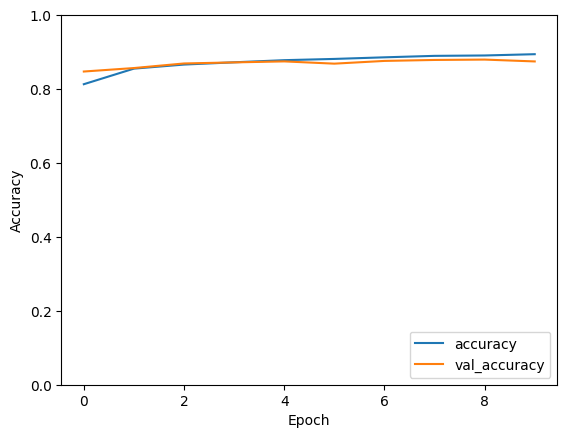

In [51]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

313/313 [==============================] - 1s 2ms/step


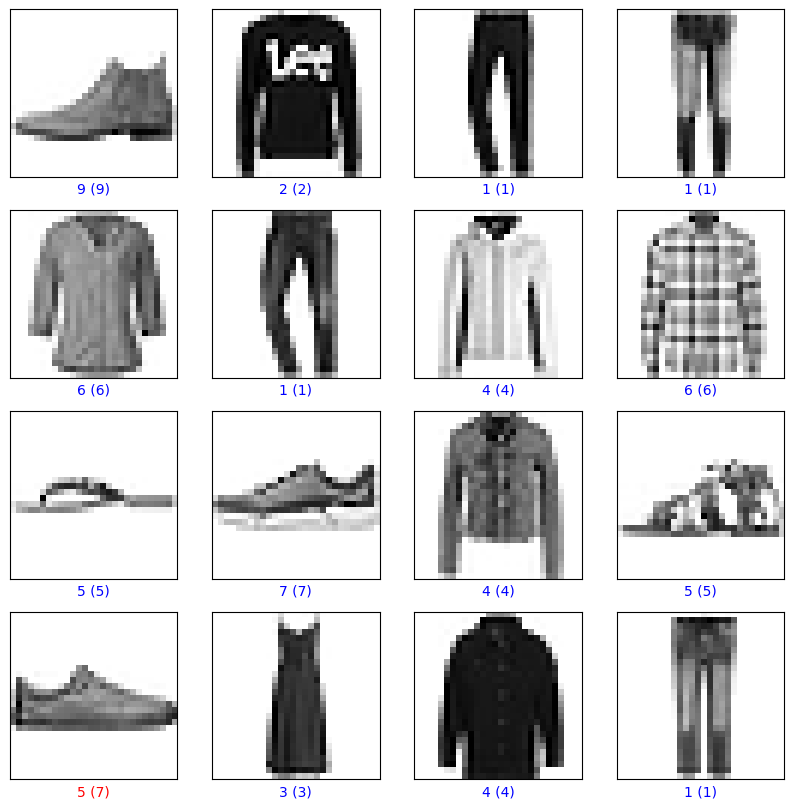

In [52]:
# Make predictions
predictions = model.predict(X_test)
# Plot some predictions with their true labels
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f'{predicted_label} ({true_label})', color=color)
plt.show()


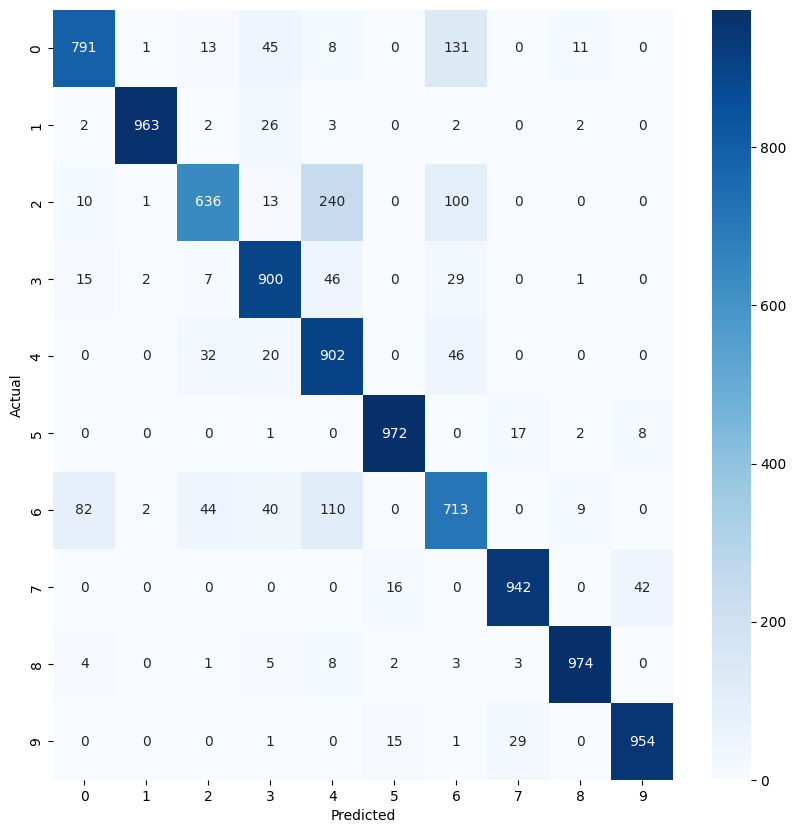

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Compute confusion matrix
y_pred = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10),
yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Exercise 3 - Data augmentation

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Reshape the data to include the channel dimension
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Define data augmentation
datagen = ImageDataGenerator(
 rotation_range=10,
 width_shift_range=0.1,
 height_shift_range=0.1,
 zoom_range=0.1
)
# Fit the data generator on the training data
datagen.fit(X_train)
# Train the model with augmented data
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.7344 - accuracy: 0.7246 - val_loss: 0.3968 - val_accuracy: 0.8599
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.6523 - accuracy: 0.7523 - val_loss: 0.3988 - val_accuracy: 0.8497
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.6208 - accuracy: 0.7645 - val_loss: 0.3952 - val_accuracy: 0.8535
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.6031 - accuracy: 0.7717 - val_loss: 0.4058 - val_accuracy: 0.8494
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.5926 - accuracy: 0.7763 - val_loss: 0.3897 - val_accuracy: 0.8556
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.5828 - accuracy: 0.7796 - val_loss: 0.4011 - val_accuracy: 0.8505
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.5762 - accuracy: 0.7823 - val_loss: 0.4032 -

313/313 - 1s - loss: 0.3912 - accuracy: 0.8559 - 509ms/epoch - 2ms/step

Test accuracy: 0.85589998960495


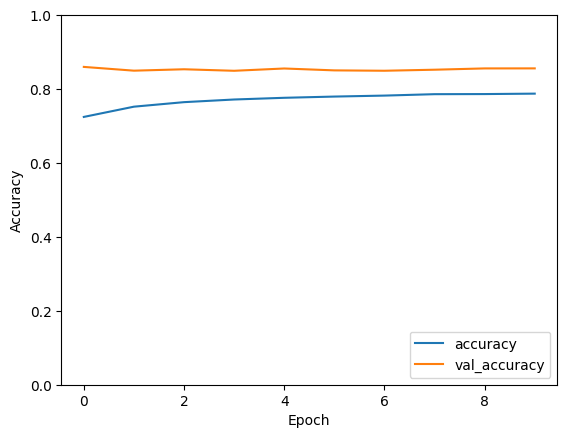

In [55]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()